In [123]:
import numpy as np
from scipy.integrate import quad
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Constants (you can update these with actual values)
U0 = 1.0  # Scaling constant
hw = 1.0  # Constant involving hbar and frequency
s = 1.0  # Length scaling factor
delta = 0.5  # Trap parameter
omega = 0.3  # Trap parameter
r_max = 2 # Edge of the computation box

In [124]:
# Potential function V(r)
def V(r, s, delta, omega):
    arg = ((r / s)**2 - delta)**2 + (2 * omega)**2
    return hw * np.sqrt(arg)

In [125]:
# Compute the potential at the center of the trap (r=0)
V0 = V(0, s, delta, omega)

In [126]:
# Radial density integrand
def n_r(r, mu, s, delta, omega, U0):
    V_r = V(r, s, delta, omega)
    if mu > V_r:
        return (mu - V_r) / U0 * 4 * np.pi * r**2
    else:
        return 0.0

In [127]:
# Integral for total number of particles N(mu)
def N_mu(mu, s, delta, omega, U0, r_max):
    if mu > V0:
        # BEC at r=0 (n > 0 at r=0)
        integral, _ = quad(n_r, 0, r_max, args=(mu, s, delta, omega, U0))
    else:
        # No BEC at r=0, integrate only for mu > V(r)
        def shell_integrand(r):
            V_r = V(r, s, delta, omega)
            return (mu - V_r) / U0 * 4 * np.pi * r**2 if mu > V_r else 0.0
        
        integral, _ = quad(shell_integrand, 0, r_max)
    return integral

In [128]:
# Function to compute the minimum value of V(r)
def V_min(s, delta, omega, r_max, num_points=1000):
    """
    Compute the minimum value of the potential V(r) over a specified range.

    Parameters:
        s (float): Length scaling factor.
        delta (float): Trap parameter.
        omega (float): Trap parameter.
        r_max (float): Maximum r value to evaluate.
        num_points (int): Number of points to sample.

    Returns:
        float: Minimum value of V(r).
    """
    r_values = np.linspace(0, r_max, num_points)  # Range of r values
    V_values = [V(r, s, delta, omega) for r in r_values]  # Compute V(r)
    return min(V_values)

# Compute the minimum value of V(r)
V_min_value = V_min(s, delta, omega, r_max)
print(f"The minimum value of V(r) is: {V_min_value}")

The minimum value of V(r) is: 0.6000002666150107


In [129]:
# Generate data points for N(mu)
mu_values = np.linspace(0.1, 5.0, 100)
N_values = [N_mu(mu, s, delta, omega, U0, r_max) for mu in mu_values]

In [130]:
# Filter out duplicate N values
unique_indices = np.unique(N_values, return_index=True)[1]
N_values_filtered = [N_values[i] for i in sorted(unique_indices)]
mu_values_filtered = [mu_values[i] for i in sorted(unique_indices)]

In [131]:
# Interpolate to find mu(N)
mu_of_N = interp1d(N_values_filtered, mu_values_filtered, kind="cubic", fill_value="extrapolate")

In [132]:
# Define n(r) with separate cases for mu > V(0) and mu <= V(0)
def n_r(r, mu, s, delta, omega, U0):
    V_r = V(r, s, delta, omega)
    if mu > V0:
        # BEC at r=0
        return max((mu - V_r) / U0, 0.0)
    else:
        # Shell structure, density exists only where mu > V(r)
        return max((mu - V_r) / U0, 0.0) if mu > V_r else 0.0

In [133]:
# Examples: Plot n(r) for 3 different values of mu
mu_examples = [V0 - 0.15, V0 - 0.1, V0 + 0.1, V0 + 0.2]  # One below V(0), two above
r_values = np.linspace(0, r_max, 500)

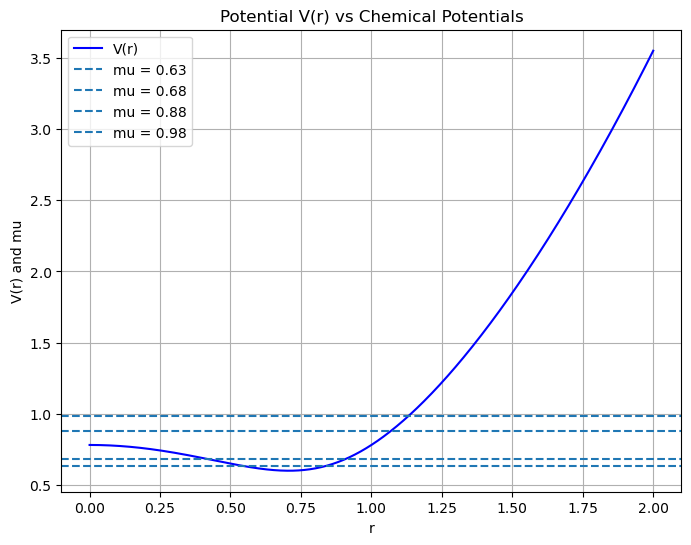

In [134]:
# Compute V(r) values for this range
V_values_zoomed = [V(r, s, delta, omega) for r in r_values_zoomed]

# Plot V(r) and all mu lines for the range [0, 2]
plt.figure(figsize=(8, 6))
plt.plot(r_values_zoomed, V_values_zoomed, label="V(r)", color="blue")
for mu in mu_examples:
    plt.axhline(y=mu, linestyle="--", label=f"mu = {mu:.2f}")

# Plot settings
plt.xlabel("r")
plt.ylabel("V(r) and mu")
plt.title("Potential V(r) vs Chemical Potentials")
plt.legend()
plt.grid()
plt.show()

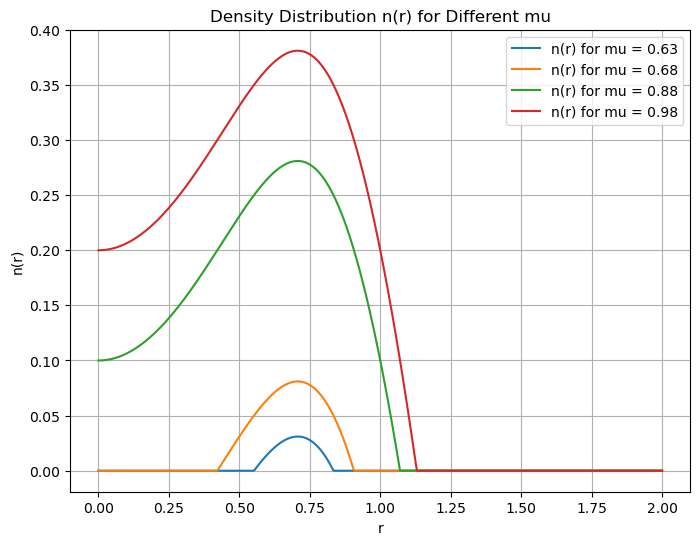

In [135]:
plt.figure(figsize=(8, 6))
for mu in mu_examples:
    n_values = [n_r(r, mu, s, delta, omega, U0) for r in r_values]
    plt.plot(r_values, n_values, label=f"n(r) for mu = {mu:.2f}")

# Plot settings
plt.xlabel("r")
plt.ylabel("n(r)")
plt.title("Density Distribution n(r) for Different mu")
plt.legend()
plt.grid()
plt.show()

In [136]:
# Function to generate mu values and compare to V_min
def compare_mu_to_V_min(mu_values, V_min_value):
    """
    Compare a list of mu values to a given V_min and print a warning if mu < V_min.

    Parameters:
        mu_values (list): List of mu values to compare.
        V_min_value (float): Precomputed minimum value of V(r).

    Returns:
        None
    """
    print(f"Minimum value of V(r): {V_min_value:.2f}")

    # Compare each mu to V_min
    for mu in mu_values:
        if mu < V_min_value:
            print(f"Warning: mu = {mu:.2f} is less than V_min = {V_min_value:.2f}!")

# Precompute V_min
V_min_value = V_min(s, delta, omega, r_max)

# Call the function with generated mu values and precomputed V_min
compare_mu_to_V_min(mu_examples, V_min_value)

Minimum value of V(r): 0.60
